In [1]:
#mount drive
#import drive
from google.colab import drive
drive.mount('/content/drive')

emtrainpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/embeddings_train_xml.npy'
emtestpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/embeddings_test_xml.npy'
#import libraries
import numpy as np
import pandas as pd

embeddings_train = np.load(emtrainpath)
embeddings_train = embeddings_train.tolist()
embeddings_test = np.load(emtestpath)
embeddings_test = embeddings_test.tolist()


MessageError: Error: credential propagation was unsuccessful

In [ ]:
#check embedding feature dimension size
print('train_embeddings:', np.array(embeddings_train).shape) # Convert to numpy array to check shape
print('test_embeddings:', len(embeddings_test)) # Length of list is appropriate here

train_embeddings: (1222641, 384)
test_embeddings: 523989


In [ ]:
ytrainpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/y_train_llm.csv'
ytestpath = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/xml/y_test_llm.csv'
y_train_llm = pd.read_csv(ytrainpath)
y_test_llm = pd.read_csv(ytestpath)
y_train_llm = y_train_llm.iloc[:, 1]
y_test_llm = y_test_llm.iloc[:, 1]

print('y_train_llm:', y_train_llm.shape)
print('y_test_llm:', y_test_llm.shape)

y_train_llm: (1222641,)
y_test_llm: (523989,)


In [ ]:

print('train_embeddings:', len(embeddings_train))
print('test_embeddings:', len(embeddings_test))

train_embeddings: 1222641
test_embeddings: 523989


In [ ]:
from sklearn.decomposition import PCA

def apply_pca(X_train, X_test, variance_threshold=0.95):
    # Fit PCA on training data
    pca = PCA(n_components=variance_threshold, svd_solver='full')
    pca.fit(X_train)

    # Transform both train and test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    n_components = pca.n_components_
    print(f"Number of components selected: {n_components}")
    print(f"Cumulative explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

    return X_train_pca, X_test_pca, n_components

# Apply PCA to embeddings
embeddings_train_pca, embeddings_test_pca, n_components = apply_pca(embeddings_train, embeddings_test)

print(embeddings_train_pca.shape)
print(embeddings_test_pca.shape)
print(f"Number of components selected: {n_components}")

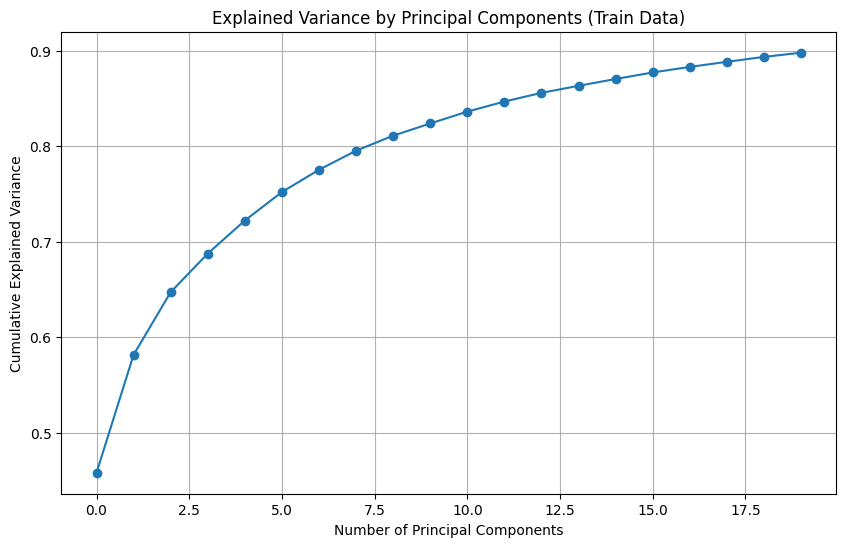

Top features for each principal component (Train Data):
    PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  PC14  \
0  341   81  373  217  188  260  132   64  356    41   254   368   247   190   
1  173  211  327  107  310    0  234  101   30    51   297   299    19   240   
2   75   32  263    0  136   13   91  211  313   268   219   185   246   162   
3   50  109  383   26  352  308  366  250  237   259    72   345   250   382   
4  202  263  334  105  237   21   13   81  197   115    96   188   194   292   
5  144   25  250  347  225  333  271   54   21   153   208   135   198   215   
6  180  174   74  178   12   37  300  306  269     7   170   298   141   137   
7  259  227  120   16   86  113   31  229  250   152   261     3   240   109   
8  160  123  188  238    2  226  297  257   50   200   374   356   283   353   
9  149  120  194  130  284  277  186  373   32   242   287   325   103   264   

   PC15  PC16  PC17  PC18  PC19  PC20  
0   301   208   341   

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Apply PCA on the training data
pca = PCA(n_components=20)  # Adjust the number of components or the variance ratio
principal_components_train = pca.fit_transform(embeddings_train)
X_train_pca = principal_components_train

# Step 3: Analyze explained variance for the training data
explained_variance_train = pca.explained_variance_ratio_
cumulative_variance_train = np.cumsum(explained_variance_train)

# Plot the explained variance for the training data
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_test, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (Train Data)')
plt.grid()
plt.show()

# Step 4: Analyze loading scores for the training data
loading_scores_train = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))])
top_features_train = loading_scores_train.apply(lambda x: np.abs(x).nlargest(10).index, axis=0)  # Top 10 features for each PC

print("Top features for each principal component (Train Data):\n", top_features_train)


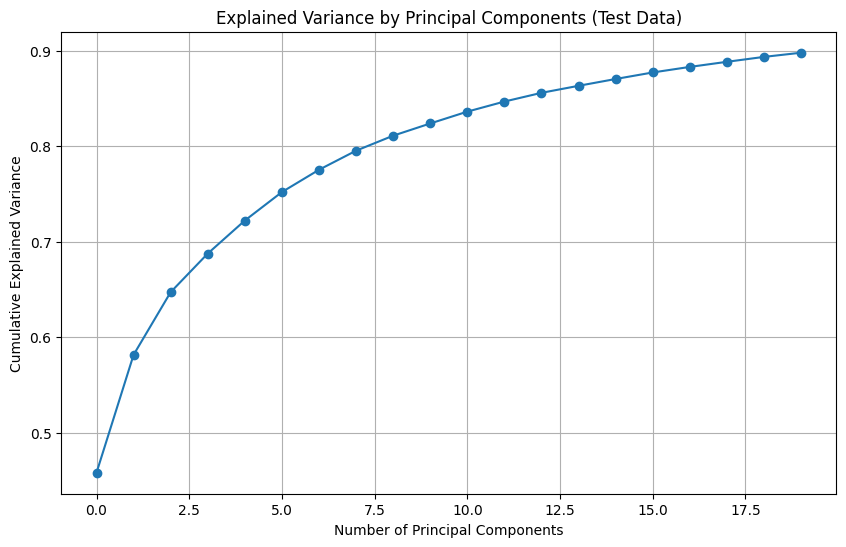

Top features for each principal component (Test Data):
    PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11  PC12  PC13  PC14  \
0  341   81  373  217  188  260  132   64  356    41   254   368   247   190   
1  173  211  327  107  310    0  234  101   30    51   297   299    19   240   
2   75   32  263    0  136   13   91  211  313   259   219   185   246   162   
3   50  109  383   26  352  308  366  250  197   268    72   345   250   382   
4  202  263  334  105  237   21   13   81  237   115    96   188   194   292   
5  144   25  250  178  225  333  271   54   21   153   170   135   198   109   
6  180  174   74  347   12   37  300  306  269     7   287     3   141   137   
7  259  227  120   16   86  226   31  229  250   152   374   298   103   215   
8  160  123  188  130    2  113  186  257   89   200   201    96   283   353   
9  149  120  194  238  364  277  297  373   50   242   208   128   173   264   

   PC15  PC16  PC17  PC18  PC19  PC20  
0   224   208   341   3

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Apply PCA on the training data
pca = PCA(n_components=20)  # Adjust the number of components or the variance ratio
principal_components_test = pca.fit_transform(embeddings_test)
X_test_pca = principal_components_test

# Step 3: Analyze explained variance for the training data
explained_variance_test = pca.explained_variance_ratio_
cumulative_variance_test = np.cumsum(explained_variance_test)

# Plot the explained variance for the training data
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_test, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components (Test Data)')
plt.grid()
plt.show()

# Step 4: Analyze loading scores for the training data
loading_scores_test = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))])
top_features_test = loading_scores_test.apply(lambda x: np.abs(x).nlargest(10).index, axis=0)  # Top 10 features for each PC

print("Top features for each principal component (Test Data):\n", top_features_test)


In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1222641, 20)
(523989, 20)


In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns #for plots
#our models and ML tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm  # Import tqdm for notebook usage

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()

models = [rfc, abc, gbc, etc, lr, knn]
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'Logistic Regression', 'KNN']

def predicting_anomaly(X_train, X_test, y_train, y_test, models, names): #define prediction function
  display(HTML('<h1>Predicting Anomaly</h1>')) #display HTML

  def training(model, name, axes): #define training function
    model.fit(X_train, y_train) #fit the model
    pred = model.predict(X_test) #predict the values
    score = accuracy_score(y_test, pred) #obtain score
    report = classification_report(y_test, pred) #obtain report
    cm = confusion_matrix(y_test, pred) #obtain CM
    sns.heatmap(cm, annot=True, ax=axes) #optain heatmap
    axes.set_title("{}: {}%".format(name, round(score*100, 2))) #display formatting
    return score*100, report #returned results

  display(HTML('<h1>Training and evaluation of Network Traffic Binary Prediction</h1>')) #display HTML

  #create plots
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,7)) #create plots
  index = 0
  scores, reports = [], dict()
  for i in tqdm(range(2), desc="Row Progress"):
        for j in tqdm(range(3), desc="Column Progress", leave=False):
            print("Current Model: ", names[index])
            score, report = training(models[index], names[index], axes[i][j])
            print("Scoore: ", score)
            reports[names[index]] = report
            index += 1
            scores += [score]
  plt.tight_layout()
  plt.show()

  dt = pd.DataFrame({"scores": scores}, index=names)
  dt = dt.sort_values("scores", ascending=False)
  dt["scores"] = round(dt["scores"], 2)
  fig, axes = plt.subplots()
  sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
  for container in axes.containers:
      axes.bar_label(container)
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
  axes.set_xlabel("Model Names")
  axes.set_title("Model Accuracy")
  plt.show()

  for i in dt.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

Row Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Column Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Current Model:  Random Forest
Scoore:  99.43071324016344
Current Model:  AdaBoost
Scoore:  98.27782644292151
Current Model:  Gradient Boost
Scoore:  98.70436211447186


Column Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Current Model:  Extra Trees
Scoore:  99.32784848536896
Current Model:  Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scoore:  98.01980575928121
Current Model:  KNN
Scoore:  99.17002074471029


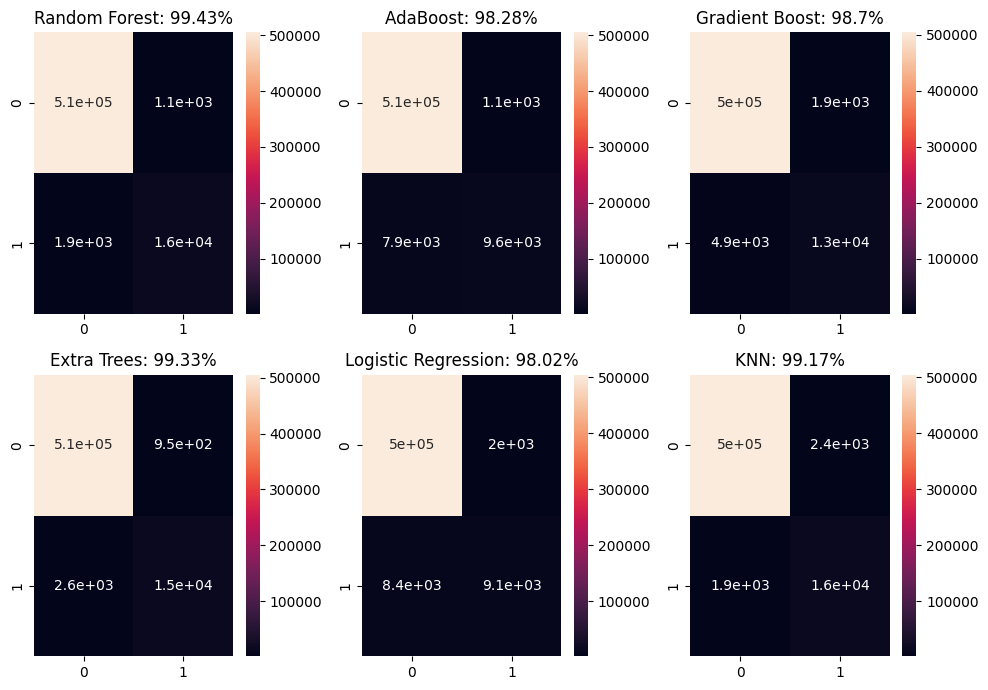

<ipython-input-8-3e998ff1a402>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


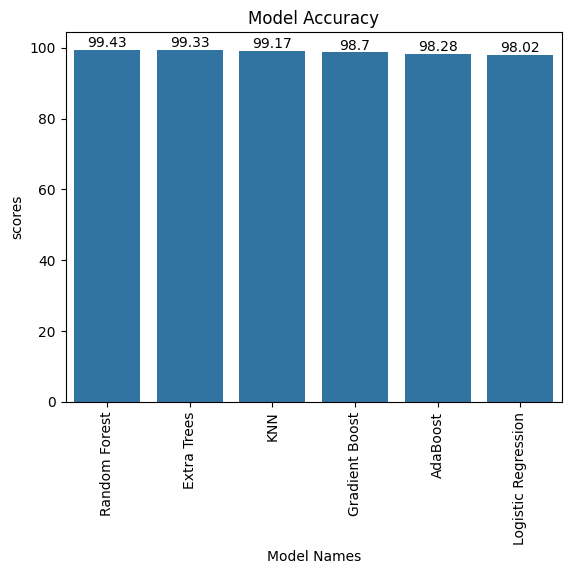

******************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    506436
           1       0.94      0.89      0.91     17553

    accuracy                           0.99    523989
   macro avg       0.97      0.94      0.96    523989
weighted avg       0.99      0.99      0.99    523989




******************************
Extra Trees
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    506436
           1       0.94      0.85      0.89     17553

    accuracy                           0.99    523989
   macro avg       0.97      0.93      0.95    523989
weighted avg       0.99      0.99      0.99    523989




******************************
KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    506436
           1       0.87      0.89      0.88     17553

    accuracy                           0.99    523989

In [ ]:
predicting_anomaly(X_train_pca, X_test_pca, y_train_llm, y_test_llm, models, model_names)

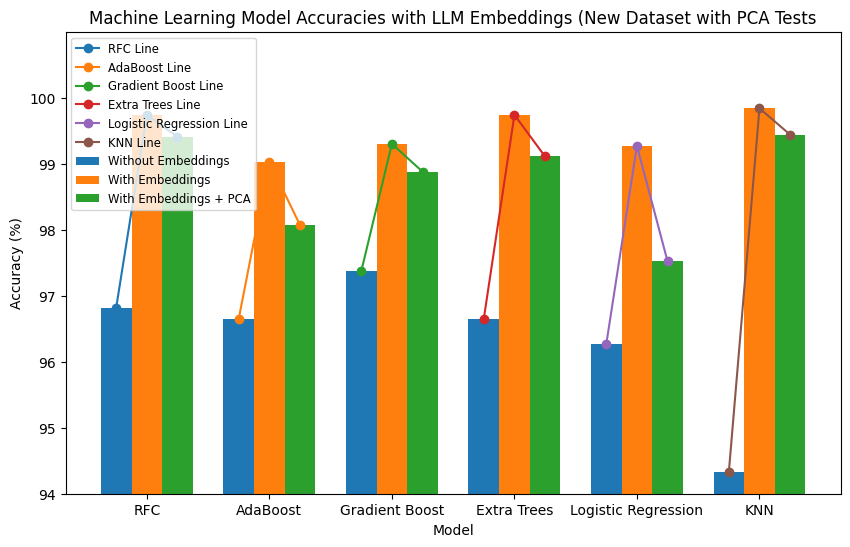

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['RFC', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'Logistic Regression', 'KNN']
without_embeddings = [96.82, 96.65, 97.37, 96.65, 96.27, 94.33]
with_embeddings = [99.74, 99.03, 99.30, 99.74, 99.27, 99.84]
with_embeddings_pca = [99.41, 98.07, 98.88, 99.11, 97.52, 99.44]

# Plot configuration
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
bar_width = 0.25
index = range(len(models))

bars1 = ax.bar(index, without_embeddings, bar_width, label='Without Embeddings')
bars2 = ax.bar([p + bar_width for p in index], with_embeddings, bar_width, label='With Embeddings')
bars3 = ax.bar([p + bar_width * 2 for p in index], with_embeddings_pca, bar_width, label='With Embeddings + PCA')

# Line plots - adding individual line plots for each cluster
for i, model in enumerate(models):
    x_values = [i, i + bar_width, i + 2 * bar_width]
    y_values = [without_embeddings[i], with_embeddings[i], with_embeddings_pca[i]]
    ax.plot(x_values, y_values, marker='o', linestyle='-', label=f'{model} Line')

# Adjusting Y-axis limits and ticks
ax.set_ylim(94, 101)  # Set the new y-axis limits slightly above the max value
ax.set_yticks(np.arange(94, 101, 1))  # Detailed steps from 94.0 to 100.0


# Formatting
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Machine Learning Model Accuracies with LLM Embeddings (New Dataset with PCA Tests')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(models)
ax.legend(fontsize='small')

plt.show()
